# 4 Clusters with 2 independent variables, Fare and Age (Just for demonstration purpose)

## Importing data

Libraries and the data will be imported

In [170]:
import numpy as np
import pandas as pd
data_raw=pd.read_csv('/content/data_for_unsupervisioned.csv',index_col=0)

## Clean the data

The data will be clean preparing for training and modeling

In [171]:
data_raw

,Age,Pclass,SibSp,Parch,Fare,Sex,Embarked Cherbourg,Embarked Queenstown,Embarked Southampton,Crew,Royal,Married women,Single women,Heir,Men,Survived,Name,Estimed Probability
0,22.000000,3,1,0,7.2500,0,0,0,1,0,0,0,0,0,1,0.0,"Braund, Mr. Owen Harris",7.587837
1,38.000000,1,1,0,71.2833,1,1,0,0,0,0,1,0,0,0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",92.873329
2,26.000000,3,0,0,7.9250,1,0,0,1,0,0,0,1,0,0,1.0,"Heikkinen, Miss. Laina",62.733235
3,35.000000,1,1,0,53.1000,1,0,0,1,0,0,1,0,0,0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",91.305065
4,35.000000,3,0,0,8.0500,0,0,0,1,0,0,0,0,0,1,0.0,"Allen, Mr. William Henry",8.056557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.588427,3,0,0,8.0500,0,0,0,1,0,0,0,0,0,1,0.0,"Spector, Mr. Woolf",9.921523
1305,39.000000,1,0,0,108.9000,1,1,0,0,0,0,0,0,0,0,1.0,"Oliva y Ocana, Dona. Fermina",91.669405
1306,38.500000,3,0,0,7.2500,0,0,0,1,0,0,0,0,0,1,0.0,"Saether, Mr. Simon Sivertsen",7.164314
1307,28.588427,3,0,0,8.0500,0,0,0,1,0,0,0,0,0,1,0.0,"Ware, Mr. Frederick",9.921523


### Selecting the data

Selecting Age and Fare Columns

In [172]:
X = data_raw.iloc[:,[0,4]].values # for fare and age
#X = data_raw.iloc[:,:-2].values # for all
X_no_scaled = X
print(X)

[[22.          7.25      ]
 [38.         71.2833    ]
 [26.          7.925     ]
 ...
 [38.5         7.25      ]
 [28.58842651  8.05      ]
 [ 6.61944302 22.3583    ]]


##Feature Scaling


.fit() Calculate the mean and standard deviation to use on transform(), and store the values in the StandardScaler() class instance, in this case in the variable sc

.transform() perform standardization by the following formula:
$\mathrm{x}_{standardization}^{}=\frac{x-mean}{standard\text{ }deviation}$

----------------------------

use print(sc.mean_) to see the mean 

use print(sc.var_) to see the variance

use print(np.sqrt(sc.var_)) or print(sc.scale_) to see the standard deviation

-----------------------------

The dummy variables, like embarked, aren't standardized because they are already between 0 and 1

----------------------------

We don't use fit again in X_test because the train is the one that should build the model and scalling

----------------------------

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [173]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#X[:,:-10] = sc.fit_transform(X[:,:-10]) #slicing the dummy variable
X = sc.fit_transform(X)

## Elbow Method to find optimal number of clusters

Elbow method is a method to find the optimal number of clusters.

You must choose the numbers of the clusters based in the X axis in the graph, where the line stops to decline.

In this case we chose 4 clusters.

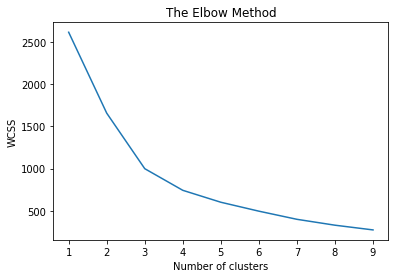

In [174]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []

for i in range(1,10):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##Build the model

Instantiate the object with the name **kmeans** as a model, for the machine learning

**y_kmeans** is a list that contain the numbers referring to the cluster.

In [175]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[0 3 0 ... 0 0 1]


##Visualization


Plotting a graph to visualize better the clusters in different colors

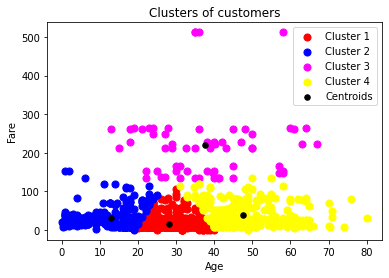

In [176]:
plt.scatter(X_no_scaled[y_kmeans == 0, 0], X_no_scaled[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X_no_scaled[y_kmeans == 1, 0], X_no_scaled[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X_no_scaled[y_kmeans == 2, 0], X_no_scaled[y_kmeans == 2, 1], s = 50, c = 'magenta', label = 'Cluster 3')
plt.scatter(X_no_scaled[y_kmeans == 3, 0], X_no_scaled[y_kmeans == 3, 1], s = 50, c = 'yellow', label = 'Cluster 4')

# reverse scalation for the cluster locations
cluster_location = sc.inverse_transform(kmeans.cluster_centers_)
cluster_location_x = []
cluster_location_y = []
for l in cluster_location:
  cluster_location_x.append(l[0])
  cluster_location_y.append(l[1])
plt.scatter(cluster_location_x, cluster_location_y, s = 30, c = 'black', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.show()

##Tests

####Kruskal for Age and Fare

Creating variables for Clusters, Age and Fare

In [177]:
cluster_1_Age = X_no_scaled[y_kmeans==0,0]
cluster_2_Age = X_no_scaled[y_kmeans==1,0]
cluster_3_Age = X_no_scaled[y_kmeans==2,0]
cluster_4_Age = X_no_scaled[y_kmeans==3,0]
cluster_1_Fare = X_no_scaled[y_kmeans==0,1]
cluster_2_Fare = X_no_scaled[y_kmeans==1,1]
cluster_3_Fare = X_no_scaled[y_kmeans==2,1]
cluster_4_Fare = X_no_scaled[y_kmeans==3,1]


Testing with kruskal all Age variables

In [178]:
import scipy.stats as stats

In [179]:
# Age kruskal
t,p= stats.kruskal(cluster_1_Age,cluster_2_Age,cluster_3_Age,cluster_4_Age)

print("Ho = hipotesis null, the clusters do not differ significantly from Age")
print("Ha = alternative hipotesis, the clusters differ significantly from Age")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters do not differ significantly from Age
Ha = alternative hipotesis, the clusters differ significantly from Age
Ho was rejected, they differ significantly, p-value= 5.245043218038982e-215


Testing with kruskal all Fare variables

In [180]:
# Fare kruskal
t,p= stats.kruskal(cluster_1_Fare,cluster_2_Fare,cluster_3_Fare,cluster_4_Fare)

print("Ho = hipotesis null, the clusters do not differ significantly from Fare")
print("Ha = alternative hipotesis, the clusters differ significantly from Fare")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters do not differ significantly from Fare
Ha = alternative hipotesis, the clusters differ significantly from Fare
Ho was rejected, they differ significantly, p-value= 1.859237872989658e-91


####T-test for Age

Testing with T-test for Age in Clusters 1 and 2

In [181]:
# Age ttest_ind
t,p= stats.ttest_ind(cluster_1_Age,cluster_2_Age ) 

print("Ho = hipotesis null, the clusters 1 and 2 do not differ significantly from Age")
print("Ha = alternative hipotesis, the clusters 1 and 2 differ significantly from Age")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters 1 and 2 do not differ significantly from Age
Ha = alternative hipotesis, the clusters 1 and 2 differ significantly from Age
Ho was rejected, they differ significantly, p-value= 2.469994348251704e-205


Testing with T-test for Age in Clusters 1 and 3

In [182]:
# Age ttest_ind
t,p= stats.ttest_ind(cluster_1_Age,cluster_3_Age ) 

print("Ho = hipotesis null, the clusters  1 and 3 do not differ significantly from Age")
print("Ha = alternative hipotesis, the clusters  1 and 3 differ significantly from Age")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters  1 and 3 do not differ significantly from Age
Ha = alternative hipotesis, the clusters  1 and 3 differ significantly from Age
Ho was rejected, they differ significantly, p-value= 2.363599137895279e-31


Testing with T-test for Age in Clusters 1 and 4

In [183]:
# Age ttest_ind
t,p= stats.ttest_ind(cluster_1_Age,cluster_4_Age )

print("Ho = hipotesis null, the clusters  1 and 4 do not differ significantly from Age")
print("Ha = alternative hipotesis, the clusters  1 and 4 differ significantly from Age")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters  1 and 4 do not differ significantly from Age
Ha = alternative hipotesis, the clusters  1 and 4 differ significantly from Age
Ho was rejected, they differ significantly, p-value= 3.548095552342577e-244


Testing with T-test for Age in Clusters 2 and 3

In [184]:
# Age ttest_ind
t,p= stats.ttest_ind(cluster_2_Age,cluster_3_Age ) 

print("Ho = hipotesis null, the clusters 2 and 3 do not differ significantly from Age")
print("Ha = alternative hipotesis, the clusters 2 and 3 differ significantly from Age")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters 2 and 3 do not differ significantly from Age
Ha = alternative hipotesis, the clusters 2 and 3 differ significantly from Age
Ho was rejected, they differ significantly, p-value= 1.1031365178828716e-61


Testing with T-test for Age in Clusters 2 and 4

In [185]:
# Age ttest_ind
t,p= stats.ttest_ind(cluster_2_Age,cluster_4_Age ) 

print("Ho = hipotesis null, the clusters 2 and 4 do not differ significantly from Age")
print("Ha = alternative hipotesis, the clusters 2 and 4 differ significantly from Age")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters 2 and 4 do not differ significantly from Age
Ha = alternative hipotesis, the clusters 2 and 4 differ significantly from Age
Ho was rejected, they differ significantly, p-value= 2.256516641274707e-215


Testing with T-test for Age in Clusters 3 and 4

In [186]:
# Age ttest_ind
t,p= stats.ttest_ind(cluster_3_Age,cluster_4_Age ) 

print("Ho = hipotesis null, the clusters 3 and 4 do not differ significantly from Age")
print("Ha = alternative hipotesis, the clusters 3 and 4 differ significantly from Age")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters 3 and 4 do not differ significantly from Age
Ha = alternative hipotesis, the clusters 3 and 4 differ significantly from Age
Ho was rejected, they differ significantly, p-value= 1.0117672030259162e-12


Age means

In [187]:
print("Average Age from cluster 1: ",cluster_1_Age.mean())
print("Average Age from cluster 2: ",cluster_2_Age.mean())
print("Average Age from cluster 3: ",cluster_3_Age.mean())
print("Average Age from cluster 4: ",cluster_4_Age.mean())

Average Age from cluster 1:  28.235578059603665
Average Age from cluster 2:  12.869666673555084
Average Age from cluster 3:  37.70655400825887
Average Age from cluster 4:  47.686618938890135


####T-test for Fare

Testing with T-test for Fare in Clusters 1 and 2

In [188]:
# Fare ttest_ind
t,p= stats.ttest_ind(cluster_1_Fare,cluster_2_Fare ) 

print("Ho = hipotesis null, the clusters 1 and 2 do not differ significantly from Fare")
print("Ha = alternative hipotesis, the clusters 1 and 2 differ significantly from Fare")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters 1 and 2 do not differ significantly from Fare
Ha = alternative hipotesis, the clusters 1 and 2 differ significantly from Fare
Ho was rejected, they differ significantly, p-value= 1.380443205980483e-27


Testing with T-test for Fare in Clusters 1 and 3

In [189]:
# Fare ttest_ind
t,p= stats.ttest_ind(cluster_1_Fare,cluster_3_Fare ) 

print("Ho = hipotesis null, the clusters 1 and 3 do not differ significantly from Fare")
print("Ha = alternative hipotesis, the clusters 1 and 3 differ significantly from Fare")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters 1 and 3 do not differ significantly from Fare
Ha = alternative hipotesis, the clusters 1 and 3 differ significantly from Fare
Ho was rejected, they differ significantly, p-value= 9.056262824965108e-258


Testing with T-test for Fare in Clusters 1 and 4

In [190]:
# Fare ttest_ind
t,p= stats.ttest_ind(cluster_1_Fare,cluster_4_Fare ) 

print("Ho = hipotesis null, the clusters 1 and 4 do not differ significantly from Fare")
print("Ha = alternative hipotesis, the clusters 1 and 4 differ significantly from Fare")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters 1 and 4 do not differ significantly from Fare
Ha = alternative hipotesis, the clusters 1 and 4 differ significantly from Fare
Ho was rejected, they differ significantly, p-value= 4.9836450736948884e-61


Testing with T-test for Fare in Clusters 2 and 3

In [191]:
# Fare ttest_ind
t,p= stats.ttest_ind(cluster_2_Fare,cluster_3_Fare ) 

print("Ho = hipotesis null, the clusters 2 and 3 do not differ significantly from Fare")
print("Ha = alternative hipotesis, the clusters 2 and 3 differ significantly from Fare")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters 2 and 3 do not differ significantly from Fare
Ha = alternative hipotesis, the clusters 2 and 3 differ significantly from Fare
Ho was rejected, they differ significantly, p-value= 4.421956827913013e-92


Testing with T-test for Fare in Clusters 2 and 4

In [192]:
# Fare ttest_ind
t,p= stats.ttest_ind(cluster_2_Fare,cluster_4_Fare ) 

print("Ho = hipotesis null, the clusters 2 and 4 do not differ significantly from Fare")
print("Ha = alternative hipotesis, the clusters 2 and 4 differ significantly from Fare")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters 2 and 4 do not differ significantly from Fare
Ha = alternative hipotesis, the clusters 2 and 4 differ significantly from Fare
Ho was rejected, they differ significantly, p-value= 0.00015957356070582531


Testing with T-test for Fare in Clusters 3 and 4

In [193]:
# Fare ttest_ind
t,p= stats.ttest_ind(cluster_3_Fare,cluster_4_Fare ) 

print("Ho = hipotesis null, the clusters 3 and 4 do not differ significantly from Fare")
print("Ha = alternative hipotesis, the clusters 3 and 4 differ significantly from Fare")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters 3 and 4 do not differ significantly from Fare
Ha = alternative hipotesis, the clusters 3 and 4 differ significantly from Fare
Ho was rejected, they differ significantly, p-value= 1.816064050068741e-89


Fare means

In [194]:
print("Average Fare from cluster 1: ",cluster_1_Fare.mean())
print("Average Fare from cluster 2: ",cluster_2_Fare.mean())
print("Average Fare from cluster 3: ",cluster_3_Fare.mean())
print("Average Fare from cluster 4: ",cluster_4_Fare.mean())

Average Fare from cluster 1:  15.102339655172413
Average Fare from cluster 2:  30.454619850187267
Average Fare from cluster 3:  220.19066129032257
Average Fare from cluster 4:  39.751230560849805


Numbers of items in clusters

In [195]:
print(len(cluster_1_Age),len(cluster_2_Age),len(cluster_3_Age),len(cluster_4_Age) )

696 267 62 284


##Conclusions

* Age

  For Fare all clusters differ significantly. Average Age:

  * Cluster 1:  28.24

  * Cluster 2:  12.87

  * Cluster 3:  37.71

  * Cluster 4:  47.69

* Fare

  For Fare all clusters differ significantly. Average Fare:

  * Cluster 1:  15.10

  * Cluster 2:  30.45

  * Cluster 3:  220.19

  * Cluster 4:  39.75

* Numbers of items in clusters:

  * Cluster 1:  696

  * Cluster 2:  267

  * Cluster 3:  62

  * Cluster 4:  284

# 2 Clusters with Many independent variables

##Clean the data

The data will be clean preparing for training and modeling

In [196]:
#data = data_raw.iloc[:,:-2].copy() # with survived
data = data_raw.iloc[:,:-3].copy()
X2 = data.values 
print(data)

            Age  Pclass  SibSp  Parch      Fare  Sex  Embarked Cherbourg  \
0     22.000000       3      1      0    7.2500    0                   0   
1     38.000000       1      1      0   71.2833    1                   1   
2     26.000000       3      0      0    7.9250    1                   0   
3     35.000000       1      1      0   53.1000    1                   0   
4     35.000000       3      0      0    8.0500    0                   0   
...         ...     ...    ...    ...       ...  ...                 ...   
1304  28.588427       3      0      0    8.0500    0                   0   
1305  39.000000       1      0      0  108.9000    1                   1   
1306  38.500000       3      0      0    7.2500    0                   0   
1307  28.588427       3      0      0    8.0500    0                   0   
1308   6.619443       3      1      1   22.3583    0                   1   

      Embarked Queenstown  Embarked Southampton  Crew  Royal  Married women  \
0       

##Feature Scaling


.fit() Calculate the mean and standard deviation to use on transform(), and store the values in the StandardScaler() class instance, in this case in the variable sc

.transform() perform standardization by the following formula:
$\mathrm{x}_{standardization}^{}=\frac{x-mean}{standard\text{ }deviation}$

----------------------------

use print(sc.mean_) to see the mean 

use print(sc.var_) to see the variance

use print(np.sqrt(sc.var_)) or print(sc.scale_) to see the standard deviation

-----------------------------

The dummy variables, like embarked, aren't standardized because they are already between 0 and 1

----------------------------

We don't use fit again in X_test because the train is the one that should build the model and scalling

----------------------------

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [197]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#X2[:,:-11] = sc.fit_transform(X2[:,:-11]) # with survived
X2[:,:-10] = sc.fit_transform(X2[:,:-10]) #slicing the dummy variable

##Elbow Method to find optimal number of clusters

Elbow method is a method to find the optimal number of clusters.

You must choose the numbers of the clusters based in the X axis in the graph, where the line stops to decline.

In this case we are going to choose 2 clusters, because we need 2 groups to analyse in the tests and the logistic regression.

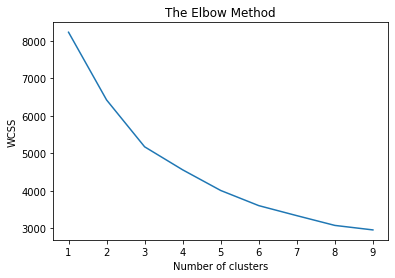

In [198]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,10):
  kmeans2 = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
  kmeans2.fit(X2)
  wcss.append(kmeans2.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##Modelling

Instantiate the object with the name **kmeans2** as a model, for the machine learning

**y_kmeans2** is a list that contain the numbers referring to the cluster.

In [199]:
kmeans2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0)
y_kmeans2 = kmeans2.fit_predict(X2)
print(y_kmeans2)

[0 1 0 ... 0 0 0]


## Correlation

Correlation for continuous variables

In [200]:
corr = data_raw[['Age','Fare','Estimed Probability']].corr() 
print(corr)

                          Age      Fare  Estimed Probability
Age                  1.000000  0.180818            -0.099048
Fare                 0.180818  1.000000             0.363444
Estimed Probability -0.099048  0.363444             1.000000


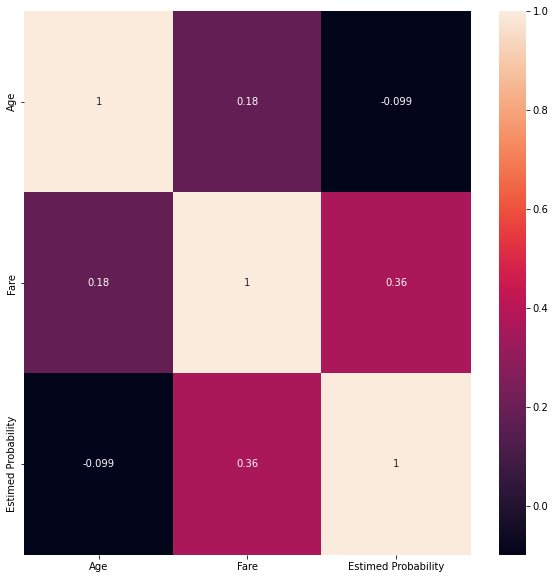

In [201]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

##Visualization

Graphs for visualize how the data distribute between the clusters in each column

Function to plot the graphs for Age and Fare

In [202]:
def hist_norm(column):
  fig , ax = plt.subplots()
  col = data.columns.get_loc(column)

  # getting the data
  series1 = data[y_kmeans2 == 1].iloc[:,col]
  series2 = data[y_kmeans2 == 0].iloc[:,col]

  # plotting
  series1.hist(density=True,edgecolor = 'black', label= 'Cluster 1')
  series2.hist(density=True,edgecolor = 'black',alpha =0.7,label= 'Cluster 2')

  plt.legend()
  ax.set_title(column)
  plt.show()

Fare

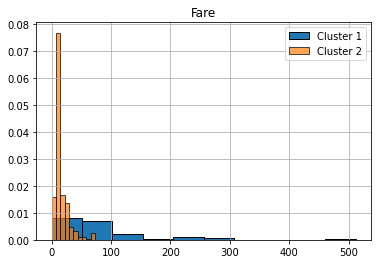

In [203]:
hist_norm("Fare")

Age

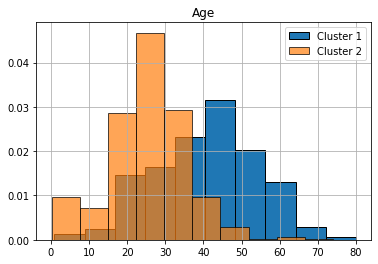

In [204]:
hist_norm("Age")

Function to plot the graphs for the others columns

In [205]:
def plot_norm(column):
  fig , ax = plt.subplots()

  # getting the index for the column
  col = data.columns.get_loc(column)

  # We need to ensure that two bar have the same lenght in x

  # it will store and sort all index for the 2 clusters
  series1 = (data[y_kmeans2 == 1].iloc[:,col].value_counts().sort_index())
  series2 = (data[y_kmeans2 == 0].iloc[:,col].value_counts().sort_index())

  # if the index is not in cluster 1 it will create on in cluster 2
  for i in series1.index:
    if i not in series2.index:
      series2.loc[i] = 0 

  # if the index is not in cluster 2 it will create on in cluster 1
  for i in series2.index:
    if i not in series1.index:
      series1.loc[i] = 0 

  # To make the bar standart, the sum of the data will be 1
  series1_norm = series1 / series1.sum()
  series2_norm = series2 / series2.sum()

  # plotting
  x = np.arange(len(series1_norm))
  width = 0.35 
  rects1 = ax.bar(x - width/2, series1_norm, width, label='Cluster 1')
  rects2 = ax.bar(x + width/2, series2_norm, width, label='Cluster 2')

  plt.xlim(-1,len(series1_norm))
  ax.set_title(column)
  plt.legend()
  plt.show()


Pclass

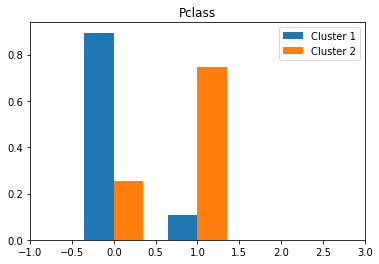

In [206]:
plot_norm("Pclass")

Sex

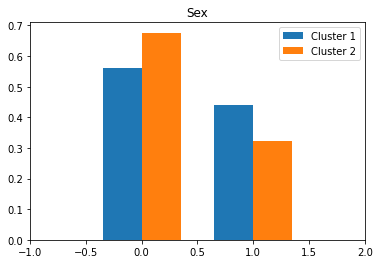

In [207]:
plot_norm("Sex")

SibSp

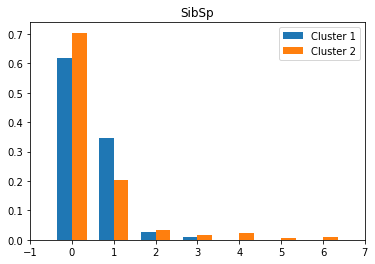

In [208]:
plot_norm("SibSp")

Parch

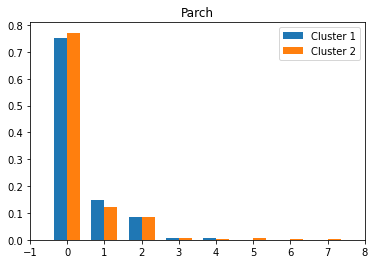

In [209]:
plot_norm("Parch")

Embarked Cherbourg

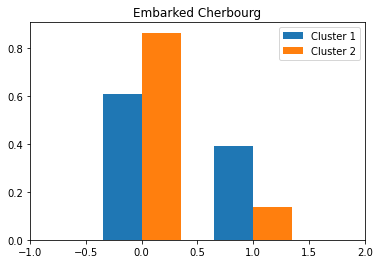

In [210]:
plot_norm("Embarked Cherbourg")

Embarked Queenstown

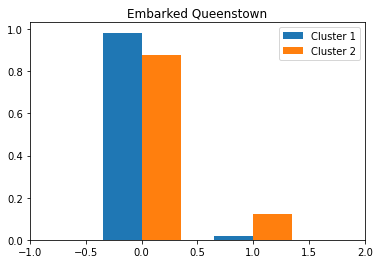

In [211]:
plot_norm("Embarked Queenstown")

Embarked Southampton

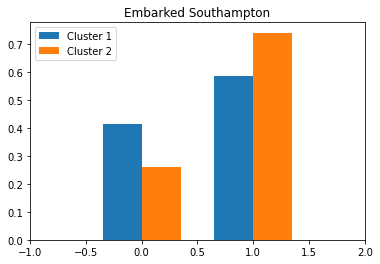

In [212]:
plot_norm("Embarked Southampton")

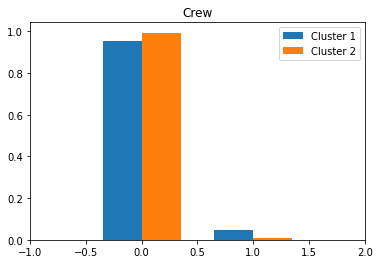

In [213]:
plot_norm("Crew")

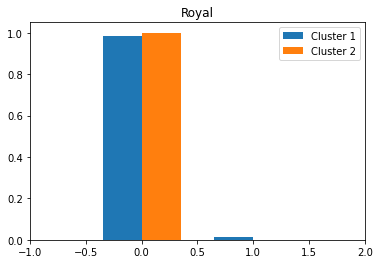

In [214]:
plot_norm("Royal")

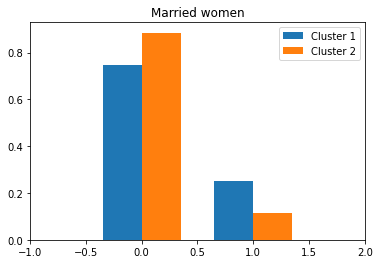

In [215]:
plot_norm("Married women")

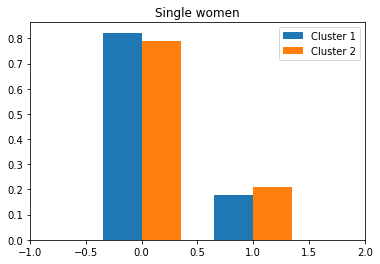

In [216]:
plot_norm("Single women")

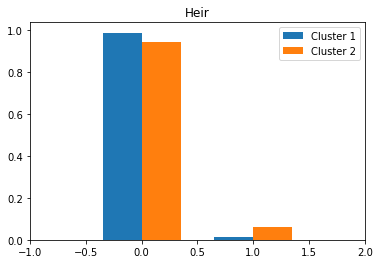

In [217]:
plot_norm("Heir")

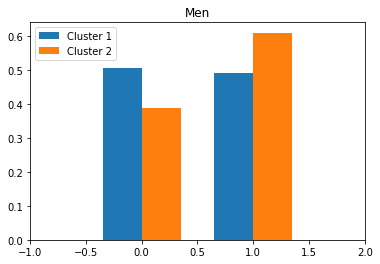

In [218]:
plot_norm("Men")

In [219]:
#plot_norm("Survived")

## Comparing

**Confusion Matrix:**

True means the predict was right

False means the predict was wrong

Positive means the value predict is 1

Negative means the value predict is 0

With those terms we can make a confusion matrix:

\begin{bmatrix}
True\text{ }Negative & False\text{ }Negative \\
False\text{ }Positive & True\text{ }Positive
\end{bmatrix}

**Accuracy** is the rate between the perdictons right and wrong

In this test the Confusion Matrix will be used this way:

* True Positive: Cluster 1 and Column value 1

* True Negative: Cluster 0 and Column value 0

* False Positive: Cluster 1 and Column value 0 

* False Negative: Cluster 0 and Column value 1

Example:

How much is the relationship between Clusters and Survived?

The test gave percentage of correlation: 82.58%

In [220]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [221]:
def matrix_correlation(tag):
  cm = confusion_matrix(data_raw.iloc[:,data_raw.columns.get_loc(tag)],  y_kmeans2)
  print('Confusion matrix: ')
  print(cm)

  print(f'True Positive:{cm[1][1]}  True Negative:{cm[0][0]}  False Positive:{cm[0][1]}  False Negative:{cm[1][0]}')

  acc = accuracy_score(data_raw.iloc[:,data_raw.columns.get_loc(tag)], y_kmeans2)

  if acc>0.5:
    print('The 2° Cluster(y_kmeans2[1]) represents the {} with value 1. Percentage of correlation: {:.2%}'.format(tag,acc))
  else:
    print('The 1° Cluster(y_kmeans2[0]) represents the {} with value 1. Percentage of correlation: {:.2%}'.format(tag,1-acc))

Survived

In [222]:
matrix_correlation('Survived')

Confusion matrix: 
[[652 151]
 [296 210]]
True Positive:210  True Negative:652  False Positive:151  False Negative:296
The 2° Cluster(y_kmeans2[1]) represents the Survived with value 1. Percentage of correlation: 65.85%


Sex

In [223]:
matrix_correlation('Sex')

Confusion matrix: 
[[641 202]
 [307 159]]
True Positive:159  True Negative:641  False Positive:202  False Negative:307
The 2° Cluster(y_kmeans2[1]) represents the Sex with value 1. Percentage of correlation: 61.12%


Embarked Cherbourg

In [224]:
matrix_correlation('Embarked Cherbourg')

Confusion matrix: 
[[819 220]
 [129 141]]
True Positive:141  True Negative:819  False Positive:220  False Negative:129
The 2° Cluster(y_kmeans2[1]) represents the Embarked Cherbourg with value 1. Percentage of correlation: 73.34%


Embarked Queenstown

In [225]:
matrix_correlation('Embarked Queenstown')

Confusion matrix: 
[[831 355]
 [117   6]]
True Positive:6  True Negative:831  False Positive:355  False Negative:117
The 2° Cluster(y_kmeans2[1]) represents the Embarked Queenstown with value 1. Percentage of correlation: 63.94%


Embarked Southampton

In [226]:
matrix_correlation('Embarked Southampton')

Confusion matrix: 
[[246 149]
 [702 212]]
True Positive:212  True Negative:246  False Positive:149  False Negative:702
The 1° Cluster(y_kmeans2[0]) represents the Embarked Southampton with value 1. Percentage of correlation: 65.01%


Crew

In [227]:
matrix_correlation('Crew')

Confusion matrix: 
[[942 344]
 [  6  17]]
True Positive:17  True Negative:942  False Positive:344  False Negative:6
The 2° Cluster(y_kmeans2[1]) represents the Crew with value 1. Percentage of correlation: 73.26%


Royal

In [228]:
matrix_correlation('Royal')

Confusion matrix: 
[[948 356]
 [  0   5]]
True Positive:5  True Negative:948  False Positive:356  False Negative:0
The 2° Cluster(y_kmeans2[1]) represents the Royal with value 1. Percentage of correlation: 72.80%


Married women

In [229]:
matrix_correlation('Married women')

Confusion matrix: 
[[839 270]
 [109  91]]
True Positive:91  True Negative:839  False Positive:270  False Negative:109
The 2° Cluster(y_kmeans2[1]) represents the Married women with value 1. Percentage of correlation: 71.05%


Single women

In [230]:
matrix_correlation('Single women')

Confusion matrix: 
[[750 297]
 [198  64]]
True Positive:64  True Negative:750  False Positive:297  False Negative:198
The 2° Cluster(y_kmeans2[1]) represents the Single women with value 1. Percentage of correlation: 62.18%


Heir

In [231]:
matrix_correlation('Heir')

Confusion matrix: 
[[892 356]
 [ 56   5]]
True Positive:5  True Negative:892  False Positive:356  False Negative:56
The 2° Cluster(y_kmeans2[1]) represents the Heir with value 1. Percentage of correlation: 68.53%


Men

In [232]:
matrix_correlation('Men')

Confusion matrix: 
[[369 183]
 [579 178]]
True Positive:178  True Negative:369  False Positive:183  False Negative:579
The 1° Cluster(y_kmeans2[0]) represents the Men with value 1. Percentage of correlation: 58.21%


##Conclusions

Without putting in calculations the survived, it was calculated the correlation between variables and the two clusters

* The following items represents the variable correlation with 1° Cluster:

  * Embarked Southampton: 65.01%

  *  Men: 58.21%

* The following items represents the variable correlation with 2° Cluster:
  
  * Survived: 65.85%

  * Sex: 61.12%

  * Embarked Cherbourg: 73.34%

  * Embarked Queenstown: 63.94%

  * Crew: 73.26%
  
  * Royal: 72.80%
  
  * Married women: 71.05%

  * Single women: 62.18%

  * Heir: 68.53%


#Logistic Regression without sklearn

In [233]:
#Initializing the Weights
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    w = np.zeros((len(dim)), dtype = float)
    b = 0
    return w,b


In [234]:
#Sigmoid function
import math
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    return 1/(1+math.exp(-z))

https://www.justintodata.com/logistic-regression-for-machine-learning-tutorial/

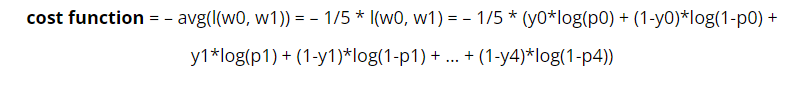

In [235]:
#Logistic Loss Function
def logloss(y_true,y_pred):
    '''In this function, we will compute log loss '''
    computed_loss = 0
    for idx in range(len(y_true)):
        computed_loss += y_true[idx] * np.log10(y_pred[idx]) + (1-y_true[idx]) * np.log10(1-y_pred[idx])
    loss = (-1)*computed_loss/len(y_true)
    return loss

https://en.wikipedia.org/wiki/Gradient_descent

https://en.wikipedia.org/wiki/Stochastic_gradient_descent

https://github.com/UserSaiVarma/Logistic-Regression-using-Gradient-Descent-without-Sklearn/blob/main/Derivation%20of%20Logistic%20Regression.pdf

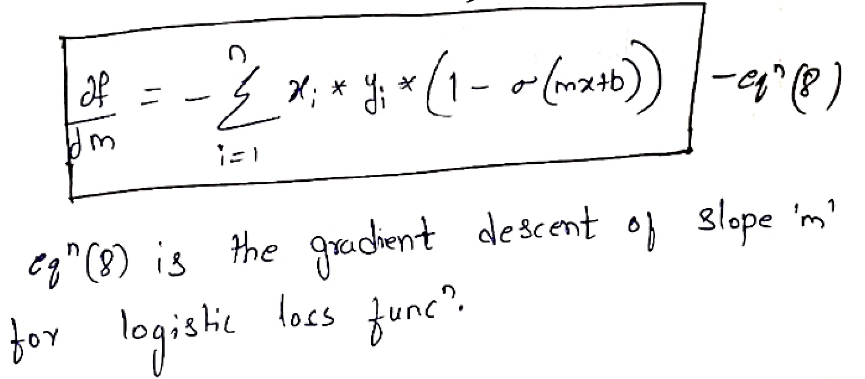

In [236]:
#Compute gradient w.r.to 'w'
def gradient_dw(x,y,w,b):
    '''In this function, we will compute the gardient w.r.to w '''
    z = np.dot(w,x)+b
    dw = -x * y*(1-sigmoid(z))
    return dw

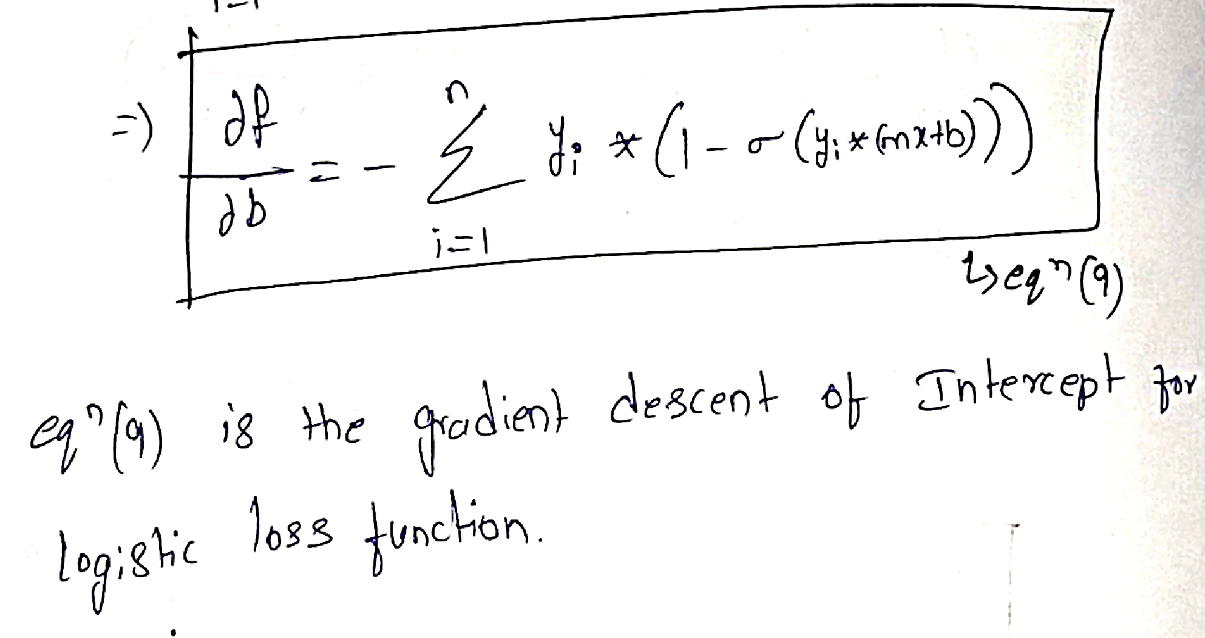

In [237]:
#Compute gradient w.r.to 'b'
def gradient_db(x,y,w,b):
    '''In this function, we will compute gradient w.r.to b '''
    z = np.dot(w, x) + b
    db = -y*(1 - sigmoid(z))
    return db

In [238]:
#Computing Predicted probability
def pred(X, w, b):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        predict.append(sigmoid(z))
    return np.array(predict)

In [239]:
#Implementing Logistic Regression with Gradient Descent
def GDLogisticRegression(x,y,epochs,eta0):
    ''' In this function, we will implement logistic regression'''
     #Initialzing weights
    w, b = initialize_weights(x[0])
    
    #Creating empty lists to store the loss, slope and intercept values for each epoch
    loss_values = []
    w_values = []
    b_values = []
    
    for epoch in range(epochs):#Loop runs for no. of epochs
        dw = 0
        db = 0
        for idx in range(len(x)): # for each datapoint
            
            #Calculating Gradient Descent for slope 
            dw += gradient_dw(x[idx], y[idx], w, b)
            #Calculating Gradient Descent for Intercept
            db += gradient_db(x[idx], y[idx], w, b)
            
        #updating the slope value
        w = w - eta0 * dw/len(x)

        #updating the intercept value
        b = b - eta0 * db/len(x)

        #appending values to the list
        w_values.append(w)
        b_values.append(b)
        
        #Predicting target variable for Train data and computing loss for the same.
        y_pred = pred(x, w, b) #Return a prediction, size len(x), list from data for only this epoch
        loss_epoch = logloss(y,y_pred) # Sends the predction list, and return the lost, size 1x1
        loss_values.append(loss_epoch) #Appending to the list
       
        print(f"epoch{epoch}: loss = {loss_epoch}")        
        
    return w_values, b_values, loss_values

Adapting the data for be used

In [240]:
#creating new dataframes x and x_cp
y= np.array(y_kmeans2)
#x= np.array(data[["Fare","Age"]])
x= np.array(data)
x_cp = x.copy()
'''
#inverting the df
for i in range (len(data[["Fare","Age"]])):
  x[i][0], x[i][1] =x[i][1], x[i][0]

df1 = pd.DataFrame(x_cp)
df2 = pd.DataFrame(y_kmeans2)
df = df1.copy()
df[2] = df2
df.rename(columns={0:'Input1',1:'Input2',2:'Class'},inplace=True)
''' 
print(x[0])
 
#Standardization
#for c in [data.columns.get_loc('Pclass'),	data.columns.get_loc('Age'),	data.columns.get_loc('SibSp'),	data.columns.get_loc('Parch'),	data.columns.get_loc('Fare'),	data.columns.get_loc('Title')]:
for c in range(7):
  for i in range(len(x)):
    #x[i][c] = (x[i][c]-x_cp[:,c].min()) / (x_cp[:,c].max()-x_cp[:,c].min())
    #people[person_number][c] = (people[person_number][c]-x_cp[:,c].min()) / (x_cp[:,c].max()-x_cp[:,c].min())
    std = np.std(x_cp[:,c])
    mean = np.mean(x_cp[:,c])
    #x = people[person_number][c]
    Standardization = (x[i][c]-mean)/std
    x[i][c] = Standardization
    #people[person_number][c] = Standardization


[22.  3.  1. ...  0.  0.  1.]


Here starts the Logistic Regression

In [241]:
#Calling the function
eta0=0.025 #Learning rate
epochs= 500 #No. of iterations

w_values, b_values, loss_values = GDLogisticRegression(x,y,epochs,eta0)

epoch0: loss = 0.3001053552496095
epoch1: loss = 0.2992046740876861
epoch2: loss = 0.29832741945183455
epoch3: loss = 0.2974730633471845
epoch4: loss = 0.29664108311999227
epoch5: loss = 0.2958309620156404
epoch6: loss = 0.29504218968569373
epoch7: loss = 0.29427426264499895
epoch8: loss = 0.29352668468016796
epoch9: loss = 0.2927989672110245
epoch10: loss = 0.2920906296068381
epoch11: loss = 0.2914011994593273
epoch12: loss = 0.29073021281457945
epoch13: loss = 0.29007721436610623
epoch14: loss = 0.2894417576113456
epoch15: loss = 0.28882340497394016
epoch16: loss = 0.28822172789413975
epoch17: loss = 0.28763630688964265
epoch18: loss = 0.28706673158918605
epoch19: loss = 0.28651260074108836
epoch20: loss = 0.28597352219893224
epoch21: loss = 0.28544911288645713
epoch22: loss = 0.2849389987436573
epoch23: loss = 0.28444281465597215
epoch24: loss = 0.28396020436837544
epoch25: loss = 0.28349082038603945
epoch26: loss = 0.28303432386316796
epoch27: loss = 0.2825903844814693
epoch28: los

From the function GDLogisticRegression gets the variables w_values, b_values and loss_values for the best values for slope and Intercept

In [242]:
#Getting the best values for slope and Intercept
w_opt = 0
b_opt = 0
'''
for idx in range(1, len(loss_values)):
    loss_diff = loss_values[idx-1] - loss_values[idx]
    
    if loss_diff < 0.0001 : # checking if the loss values are improved
        print('for epoch {} - Minimun loss: {}'.format(idx, loss_values[idx]))
        w_opt = w_values[idx-1]
        b_opt = b_values[idx-1]
        break # Terminating the loop if there is no improvment in the loss
    else:
        continue
print("Best slope: ", w_opt)
print("Best intercept: ", b_opt)
'''
count = 0
indice = 0
temp_loss_values = 2*loss_values[count]
#search the lowerest loss value
for temp in loss_values:

  if loss_values[count] < temp_loss_values:
    temp_loss_values = loss_values[count]
    w_opt = w_values[count]
    b_opt = b_values[count]
    indice = count
  count+=1


print('for epoch {} - Minimun loss: {}'.format(indice, loss_values[indice]))
print("Best slope: ", w_opt)
print("Best intercept: ", b_opt)

for epoch 115 - Minimun loss: 0.2696285823703407
Best slope:  [ 0.20306071 -0.36100176 -0.02042822 ...  0.04472979  0.00400325
  0.12884768]
Best intercept:  0.2581696354261515


Predicting

In [243]:

#people=[]
#people.append([1,1,50,1,1,500,2,0,0,1])
#people.append([3,0,20,0,0,5,7,0,1,0])
people=[]
people = data.copy()
for person_number in range(len(people)):
  #standarizating
  #for c in [data.columns.get_loc('Pclass'),	data.columns.get_loc('Age'),	data.columns.get_loc('SibSp'),	data.columns.get_loc('Parch'),	data.columns.get_loc('Fare'),	data.columns.get_loc('Title')]:
  for c in range(7):
      #print(c , ' --- ' ,people[person_number][c])
      #people[person_number][c] = (people[person_number][c]-x_cp[:,c].min()) / (x_cp[:,c].max()-x_cp[:,c].min())
      std = np.std(x_cp[:,c])
      mean = np.mean(x_cp[:,c])
      #x = people[person_number][c]
      Standardization = (people.iloc[person_number,c]-mean)/std
      people.iloc[person_number,c] = Standardization
      #people[person_number][c] = Standardization

'''   
for person_number in range(len(people)):
  #normalizating
  for c in [data.columns.get_loc('Pclass'),	data.columns.get_loc('Age'),	data.columns.get_loc('SibSp'),	data.columns.get_loc('Parch'),	data.columns.get_loc('Fare'),	data.columns.get_loc('Title')]:
      people[person_number][c] = (people[person_number][c]-x_cp[:,c].min()) / (x_cp[:,c].max()-x_cp[:,c].min())
'''

chance = pred(np.array(people),w_opt,b_opt)

for i in range(len(chance)):
  print("index: {} probability: {:.2%}".format(i,chance[i]))
#print(chance)
#print(people)

index: 0 probability: 48.39%
index: 1 probability: 80.18%
index: 2 probability: 50.46%
index: 3 probability: 76.67%
index: 4 probability: 53.91%
index: 5 probability: 49.33%
index: 6 probability: 81.40%
index: 7 probability: 37.95%
index: 8 probability: 51.03%
index: 9 probability: 60.90%
index: 10 probability: 42.20%
index: 11 probability: 80.84%
index: 12 probability: 48.20%
index: 13 probability: 55.70%
index: 14 probability: 45.89%
index: 15 probability: 71.93%
index: 16 probability: 34.68%
index: 17 probability: 63.41%
index: 18 probability: 53.30%
index: 19 probability: 55.52%
index: 20 probability: 65.85%
index: 21 probability: 64.37%
index: 22 probability: 42.51%
index: 23 probability: 73.44%
index: 24 probability: 43.14%
index: 25 probability: 55.78%
index: 26 probability: 53.84%
index: 27 probability: 84.17%
index: 28 probability: 45.84%
index: 29 probability: 51.46%
index: 30 probability: 75.73%
index: 31 probability: 84.74%
index: 32 probability: 45.80%
index: 33 probabilit

Comparing with sklearn

In [244]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc2 = StandardScaler()
lgr_sk = x_cp.copy()
lgr_sk[:,:-3] = sc.fit_transform(x_cp[:,:-3])
classifier = LogisticRegression()
classifier.fit(lgr_sk, y_kmeans2)
prediction = classifier.predict(lgr_sk)
prob = classifier.predict_proba(lgr_sk)[:,1]
#np.set_printoptions(threshold=np.inf)
np.set_printoptions(threshold=4)
for i in range(len(prob)):
  print("index: {} probability: {:.2%}".format(i,prob[i]))



index: 0 probability: 0.00%
index: 1 probability: 99.95%
index: 2 probability: 0.00%
index: 3 probability: 99.76%
index: 4 probability: 0.01%
index: 5 probability: 0.00%
index: 6 probability: 99.99%
index: 7 probability: 0.00%
index: 8 probability: 0.00%
index: 9 probability: 0.39%
index: 10 probability: 0.00%
index: 11 probability: 99.99%
index: 12 probability: 0.00%
index: 13 probability: 0.04%
index: 14 probability: 0.00%
index: 15 probability: 90.43%
index: 16 probability: 0.00%
index: 17 probability: 2.43%
index: 18 probability: 0.01%
index: 19 probability: 0.01%
index: 20 probability: 9.09%
index: 21 probability: 4.21%
index: 22 probability: 0.00%
index: 23 probability: 94.98%
index: 24 probability: 0.00%
index: 25 probability: 0.07%
index: 26 probability: 0.00%
index: 27 probability: 100.00%
index: 28 probability: 0.00%
index: 29 probability: 0.00%
index: 30 probability: 99.93%
index: 31 probability: 100.00%
index: 32 probability: 0.00%
index: 33 probability: 96.83%
index: 34 pr

In [245]:
diff = []
for i in range(len(prob)):
  diff.append(chance[i]-prob[i])
  print("Index: {}  Without Sklearn: {}  With Sklearn: {}  difference: {}".format(i,chance[i],prob[i],diff[i]) )


Index: 0  Without Sklearn: 0.48394929661956604  With Sklearn: 5.0275187441541125e-06  difference: 0.4839442691008219
Index: 1  Without Sklearn: 0.8018482006675837  With Sklearn: 0.9995267088276807  difference: -0.19767850816009702
Index: 2  Without Sklearn: 0.5045761451526436  With Sklearn: 2.8852215400254302e-05  difference: 0.5045472929372433
Index: 3  Without Sklearn: 0.7667329265227774  With Sklearn: 0.9976002972422433  difference: -0.23086737071946595
Index: 4  Without Sklearn: 0.539062366447733  With Sklearn: 8.261700688415693e-05  difference: 0.5389797494408488
Index: 5  Without Sklearn: 0.49327510517142903  With Sklearn: 4.554260255910375e-05  difference: 0.4932295625688699
Index: 6  Without Sklearn: 0.8140063777475787  With Sklearn: 0.9998912019724191  difference: -0.18588482422484043
Index: 7  Without Sklearn: 0.37949706600401684  With Sklearn: 2.8502979949294275e-07  difference: 0.37949678097421735
Index: 8  Without Sklearn: 0.5103305929624955  With Sklearn: 3.63296170183996

In [246]:

print('average Without Sklearn: {:.2%}'.format(np.mean(chance)))
print('average With Sklearn: {:.2%}'.format(np.mean(prob)))
print('average diff: {:.2%}'.format(np.mean(diff)))


average Without Sklearn: 60.11%
average With Sklearn: 27.58%
average diff: 32.53%


In [247]:

for i in range(len(prob)):
  diff.append(chance[i]-prob[i])
  print('Without Sklearn  With Sklearn -100%: {:.2%} {:.2%}'.format(1-chance[i],1-prob[i]))


Without Sklearn  With Sklearn -100%: 51.61% 100.00%
Without Sklearn  With Sklearn -100%: 19.82% 0.05%
Without Sklearn  With Sklearn -100%: 49.54% 100.00%
Without Sklearn  With Sklearn -100%: 23.33% 0.24%
Without Sklearn  With Sklearn -100%: 46.09% 99.99%
Without Sklearn  With Sklearn -100%: 50.67% 100.00%
Without Sklearn  With Sklearn -100%: 18.60% 0.01%
Without Sklearn  With Sklearn -100%: 62.05% 100.00%
Without Sklearn  With Sklearn -100%: 48.97% 100.00%
Without Sklearn  With Sklearn -100%: 39.10% 99.61%
Without Sklearn  With Sklearn -100%: 57.80% 100.00%
Without Sklearn  With Sklearn -100%: 19.16% 0.01%
Without Sklearn  With Sklearn -100%: 51.80% 100.00%
Without Sklearn  With Sklearn -100%: 44.30% 99.96%
Without Sklearn  With Sklearn -100%: 54.11% 100.00%
Without Sklearn  With Sklearn -100%: 28.07% 9.57%
Without Sklearn  With Sklearn -100%: 65.32% 100.00%
Without Sklearn  With Sklearn -100%: 36.59% 97.57%
Without Sklearn  With Sklearn -100%: 46.70% 99.99%
Without Sklearn  With Sklea

In [248]:
data


,Age,Pclass,SibSp,Parch,Fare,Sex,Embarked Cherbourg,Embarked Queenstown,Embarked Southampton,Crew,Royal,Married women,Single women,Heir,Men
0,22.000000,3,1,0,7.2500,0,0,0,1,0,0,0,0,0,1
1,38.000000,1,1,0,71.2833,1,1,0,0,0,0,1,0,0,0
2,26.000000,3,0,0,7.9250,1,0,0,1,0,0,0,1,0,0
3,35.000000,1,1,0,53.1000,1,0,0,1,0,0,1,0,0,0
4,35.000000,3,0,0,8.0500,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.588427,3,0,0,8.0500,0,0,0,1,0,0,0,0,0,1
1305,39.000000,1,0,0,108.9000,1,1,0,0,0,0,0,0,0,0
1306,38.500000,3,0,0,7.2500,0,0,0,1,0,0,0,0,0,1
1307,28.588427,3,0,0,8.0500,0,0,0,1,0,0,0,0,0,1


In [249]:
'''
#Old one DELETE
# chance to be in cluster 1 or 2

# p = Pclass,	Sex	,Age	,SibSp	,Parch,	Fare	,Title	,Embarked Cherbourg	,Embarked Queenstown,	Embarked Southampton
people=[]
people.append([1,1,50,1,1,500,2,0,0,1])
people.append([3,0,20,0,0,5,7,0,1,0])

#search the probability for every person
for person_number in range(len(people)):
  #normalizating
  for c in [data.columns.get_loc('Pclass'),	data.columns.get_loc('Age'),	data.columns.get_loc('SibSp'),	data.columns.get_loc('Parch'),	data.columns.get_loc('Fare'),	data.columns.get_loc('Title')]:
      people[person_number][c] = (people[person_number][c]-x_cp[:,c].min()) / (x_cp[:,c].max()-x_cp[:,c].min())

  chance = 0
  for i in range(len(people[person_number])):
    chance += w_opt[i]*people[person_number][i]
    
  chance += b_opt
  chance = sigmoid(chance)

  #chance = 1/(1+math.exp(chance))
  #chance = math.exp(chance)/(1+math.exp(chance))
    #chance = sigmoid(b_opt + w_opt[0]*p[0] + w_opt[1]*p[1])
  print('Person number: ', person_number,'   Chance: ',chance)
print(people)
'''

"\n#Old one DELETE\n# chance to be in cluster 1 or 2\n\n# p = Pclass,\tSex\t,Age\t,SibSp\t,Parch,\tFare\t,Title\t,Embarked Cherbourg\t,Embarked Queenstown,\tEmbarked Southampton\npeople=[]\npeople.append([1,1,50,1,1,500,2,0,0,1])\npeople.append([3,0,20,0,0,5,7,0,1,0])\n\n#search the probability for every person\nfor person_number in range(len(people)):\n  #normalizating\n  for c in [data.columns.get_loc('Pclass'),\tdata.columns.get_loc('Age'),\tdata.columns.get_loc('SibSp'),\tdata.columns.get_loc('Parch'),\tdata.columns.get_loc('Fare'),\tdata.columns.get_loc('Title')]:\n      people[person_number][c] = (people[person_number][c]-x_cp[:,c].min()) / (x_cp[:,c].max()-x_cp[:,c].min())\n\n  chance = 0\n  for i in range(len(people[person_number])):\n    chance += w_opt[i]*people[person_number][i]\n    \n  chance += b_opt\n  chance = sigmoid(chance)\n\n  #chance = 1/(1+math.exp(chance))\n  #chance = math.exp(chance)/(1+math.exp(chance))\n    #chance = sigmoid(b_opt + w_opt[0]*p[0] + w_opt[1]*p